In [1]:
import cv2
import glob
import re
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D, MaxPooling1D
import tensorflow as tf

### We want to extract every different dish we have in our subfolders

In [2]:
path = "../input/images/"

In [3]:
folders=glob.glob(f'{path}*')

In [4]:
def take_dish_name(path):
    dishes=glob.glob(f'{path}*')
    names=[]
    for dish in dishes:
        names.append(dish.replace(r'../input/images/',''))
    return names

In [5]:
names=take_dish_name(path)

In [6]:
names[0]

'lobster_roll_sandwich'

In [7]:
def pictures_to_df(path="../input/images/"):

    dishes = [
        *glob.glob(f"{path}/**/*.jpg"),
        *glob.glob(f"{path}/**/*.JPG")
    ]
    pictures = pd.DataFrame({
        "path": dishes
    })

    pictures['dish']=pictures.path.apply(lambda x: x.split("/")[3])
    return pictures


In [8]:
pictures=pictures_to_df(path="../input/images/")

In [9]:
pictures

,path,dish
0,../input/images/lobster_roll_sandwich/2019505.jpg,lobster_roll_sandwich
1,../input/images/lobster_roll_sandwich/708911.jpg,lobster_roll_sandwich
2,../input/images/lobster_roll_sandwich/784321.jpg,lobster_roll_sandwich
3,../input/images/lobster_roll_sandwich/1626426.jpg,lobster_roll_sandwich
4,../input/images/lobster_roll_sandwich/849365.jpg,lobster_roll_sandwich
...,...,...
100995,../input/images/pork_chop/3757142.jpg,pork_chop
100996,../input/images/pork_chop/3648040.jpg,pork_chop
100997,../input/images/pork_chop/1325768.jpg,pork_chop
100998,../input/images/pork_chop/766176.jpg,pork_chop


In [10]:
le = preprocessing.LabelEncoder()
pictures['dish_ord'] = le.fit_transform(pictures['dish'])

In [11]:
pictures.head()

,path,dish,dish_ord
0,../input/images/lobster_roll_sandwich/2019505.jpg,lobster_roll_sandwich,61
1,../input/images/lobster_roll_sandwich/708911.jpg,lobster_roll_sandwich,61
2,../input/images/lobster_roll_sandwich/784321.jpg,lobster_roll_sandwich,61
3,../input/images/lobster_roll_sandwich/1626426.jpg,lobster_roll_sandwich,61
4,../input/images/lobster_roll_sandwich/849365.jpg,lobster_roll_sandwich,61


### Displaying photos to check them

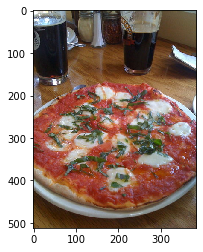

In [12]:
img = Image.open("../input/images/pizza/2965.jpg")
plt.imshow(np.array(img))

In [15]:
pictures_part=pictures[pictures['dish_ord']==0].append(pictures[pictures['dish_ord']==1]).append(pictures[pictures['dish_ord']==2])

In [16]:
pictures_part

,path,dish,dish_ord
95000,../input/images/apple_pie/1147371.jpg,apple_pie,0
95001,../input/images/apple_pie/202741.jpg,apple_pie,0
95002,../input/images/apple_pie/3198655.jpg,apple_pie,0
95003,../input/images/apple_pie/1343307.jpg,apple_pie,0
95004,../input/images/apple_pie/591398.jpg,apple_pie,0
...,...,...,...
90995,../input/images/baklava/3742847.jpg,baklava,2
90996,../input/images/baklava/3300382.jpg,baklava,2
90997,../input/images/baklava/2984698.jpg,baklava,2
90998,../input/images/baklava/3140803.jpg,baklava,2


### We define a generator to use it fot the neural net afterwards

In [88]:
path = "../input/images/pizza/"
def make_gen_callable(path):
    def genImg():
        for im in glob.glob(f"{path}/*.jpg"):
            img = cv2.imread(im)
            img2 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            dim=(150,150)
            image=cv2.resize(img2, dim,interpolation=cv2.INTER_AREA)
            yield np.array(image)
    return genImg
        
images = make_gen_callable(path)

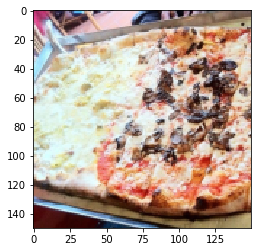

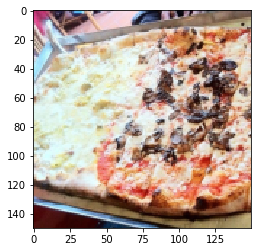

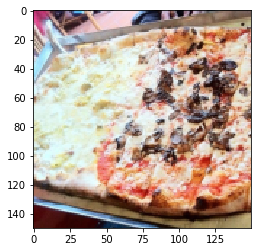

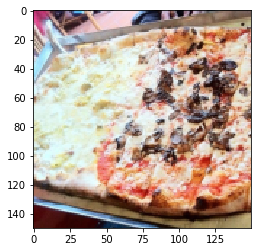

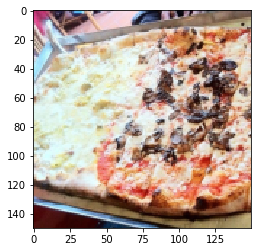

In [56]:
for _ in range(5):
    plt.figure()
    plt.imshow(next(images))

In [93]:
photos = tf.data.Dataset.from_generator(images,(tf.float32, tf.float32), (tf.TensorShape([]), tf.TensorShape([None])))

In [90]:
photos

<FlatMapDataset shapes: ((), (None,)), types: (tf.float32, tf.float32)>

In [94]:
for x,y in photos:
    break
print(x,y)

InvalidArgumentError: TypeError: `generator` yielded an element that did not match the expected structure. The expected structure was (tf.float32, tf.float32), but the yielded element was [[[188  57 116]
  [171  46 100]
  [168  45  97]
  ...
  [113  94  88]
  [119 100  94]
  [117  98  92]]

 [[200  61 123]
  [184  53 110]
  [167  43  97]
  ...
  [114  92  87]
  [121  99  94]
  [114  93  88]]

 [[208  62 128]
  [196  59 122]
  [176  48 107]
  ...
  [116  93  86]
  [112  89  82]
  [110  87  79]]

 ...

 [[ 73  11  11]
  [ 80  19  18]
  [ 79  20  18]
  ...
  [180 163 115]
  [184 168 121]
  [186 170 126]]

 [[ 77  17  16]
  [ 76  17  16]
  [ 75  18  15]
  ...
  [178 164 115]
  [182 168 123]
  [177 163 122]]

 [[ 74  15  14]
  [ 75  18  16]
  [ 72  17  14]
  ...
  [175 162 115]
  [175 162 118]
  [180 167 127]]].
Traceback (most recent call last):

  File "/home/silviaherf/.local/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py", line 833, in generator_py_func
    flattened_values = nest.flatten_up_to(output_types, values)

  File "/home/silviaherf/.local/lib/python3.8/site-packages/tensorflow/python/data/util/nest.py", line 396, in flatten_up_to
    assert_shallow_structure(shallow_tree, input_tree)

  File "/home/silviaherf/.local/lib/python3.8/site-packages/tensorflow/python/data/util/nest.py", line 297, in assert_shallow_structure
    raise TypeError(

TypeError: If shallow structure is a sequence, input must also be a sequence. Input has type: <class 'numpy.ndarray'>.


During handling of the above exception, another exception occurred:


Traceback (most recent call last):

  File "/home/silviaherf/.local/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 244, in __call__
    ret = func(*args)

  File "/home/silviaherf/.local/lib/python3.8/site-packages/tensorflow/python/autograph/impl/api.py", line 302, in wrapper
    return func(*args, **kwargs)

  File "/home/silviaherf/.local/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py", line 835, in generator_py_func
    six.reraise(TypeError, TypeError(

  File "/home/silviaherf/.local/lib/python3.8/site-packages/six.py", line 692, in reraise
    raise value.with_traceback(tb)

  File "/home/silviaherf/.local/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py", line 833, in generator_py_func
    flattened_values = nest.flatten_up_to(output_types, values)

  File "/home/silviaherf/.local/lib/python3.8/site-packages/tensorflow/python/data/util/nest.py", line 396, in flatten_up_to
    assert_shallow_structure(shallow_tree, input_tree)

  File "/home/silviaherf/.local/lib/python3.8/site-packages/tensorflow/python/data/util/nest.py", line 297, in assert_shallow_structure
    raise TypeError(

TypeError: `generator` yielded an element that did not match the expected structure. The expected structure was (tf.float32, tf.float32), but the yielded element was [[[188  57 116]
  [171  46 100]
  [168  45  97]
  ...
  [113  94  88]
  [119 100  94]
  [117  98  92]]

 [[200  61 123]
  [184  53 110]
  [167  43  97]
  ...
  [114  92  87]
  [121  99  94]
  [114  93  88]]

 [[208  62 128]
  [196  59 122]
  [176  48 107]
  ...
  [116  93  86]
  [112  89  82]
  [110  87  79]]

 ...

 [[ 73  11  11]
  [ 80  19  18]
  [ 79  20  18]
  ...
  [180 163 115]
  [184 168 121]
  [186 170 126]]

 [[ 77  17  16]
  [ 76  17  16]
  [ 75  18  15]
  ...
  [178 164 115]
  [182 168 123]
  [177 163 122]]

 [[ 74  15  14]
  [ 75  18  16]
  [ 72  17  14]
  ...
  [175 162 115]
  [175 162 118]
  [180 167 127]]].


	 [[{{node PyFunc}}]]

### We create our X_train,X_test and X_val to train out neural net for 3 classes


In [40]:
X=np.array(photos)

NameError: name 'photos' is not defined

In [39]:
y=np.array(pictures_part['dish_ord'])

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15)

In [35]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.15)

In [36]:
X_train.shape

(2167,)

In [46]:
X_train[1].shape

(512, 384)

In [ ]:
dim = (28,28)
missingNormalized = [cv2.resize(a, dim, interpolation=cv2.INTER_AREA) for a in X_train]

In [37]:
X_test.shape

(450,)

In [ ]:
tf.data.data_set.fromGenerator

In [38]:
X_val.shape

(383,)

In [39]:
X_train.shape[0]+X_test.shape[0]+X_val.shape[0]

3000

In [ ]:
# Needed if you use OpenCV, By default, it use BGR instead RGB
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Resize image to match with input model
image = cv.resize(image, (32, 32))


In [43]:

# Convert to Tensor of type float32 for example
X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)


ValueError: setting an array element with a sequence.

In [ ]:

# Add dimension to match with input mode 
image_tensor = tf.expand_dims(image_tensor, 0)

# After you can predict image for example :
predictions = probability_model.predict(
        image_tensor, use_multiprocessing=True)

In [79]:
datagen=ImageDataGenerator(rescale=1./255)

In [82]:
tf.convert_to_tensor(
    X_train, 
)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

In [73]:
modelo=Sequential()
steps=3
n_features=1

In [44]:
modelo=Sequential()
modelo.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
                  kernel_initializer='he_normal', input_shape=input_shape))

modelo.add(MaxPooling2D((2,2)))
modelo.add(Dropout(0.25))
modelo.add(Conv2D(64, (3, 3), activation='relu'))
modelo.add(MaxPooling2D((2,2)))
modelo.add(Dropout(0.25))
modelo.add(Conv2D(128, (3, 3), activation='relu'))
modelo.add(Dropout(0.4))
modelo.add(Flatten())
modelo.add(Dense(128,  activation='relu'))
modelo.add(Dropout(0.3))
modelo.add(Dense(n_clases, activation='softmax'))


modelo.compile(loss=keras.losses.categorical_crossentropy, 
               optimizer=keras.optimizers.Adam(), 
               metrics=['accuracy'])

modelo.summary()

NameError: name 'Conv2D' is not defined

### Dividing photos by classes-> para utilizarlo, tendría que hacer con train test split anterior carpetas


### Now, we must define out net typology